In [1]:
import cosmax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import powerbox as pbox

In [2]:
# load binary files
file = '../data/z0.bin'

# open file
with open(file, 'rb') as f:
    # read data
    data = f.read()
    # convert to numpy array
    rho = jnp.frombuffer(data, dtype=jnp.float32)

# reshape data
N = 256
rho = rho.reshape(N, N, N)
rho *= 2.777 * 10**11
rho += 0.0001

MPH_h = 60

delta = cosmax.helpers.compute_overdensity(rho)

print(f"delta min: {delta.min()}, delta max: {delta.max()}")

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


delta min: -0.9758629202842712, delta max: 713.81884765625


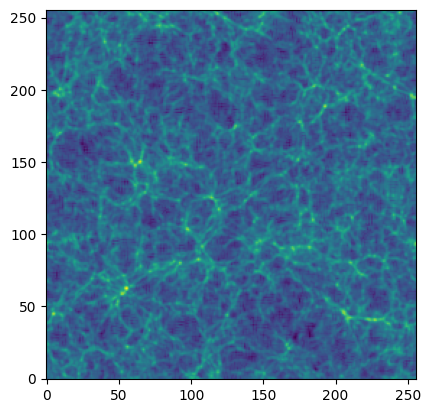

In [3]:
# plot data
plt.figure()
plt.imshow(jnp.log(rho[N//2]), origin='lower')

In [6]:
power_spectrum = cosmax.spectral_ops.PowerSpectrum(
    N, MPH_h, 80)
# compute power spectrum
k, power = power_spectrum(delta)


<>:17: SyntaxWarning: invalid escape sequence '\d'
<>:17: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_15822/2020790975.py:17: SyntaxWarning: invalid escape sequence '\d'
  plt.title('Power Spectrum of $\delta$')
/home/andrin/miniconda3/envs/cosmax/lib/python3.13/site-packages/powerbox/tools.py:261: FutureWarning: In the future, bins will be generated by default up to the smallest length over any dimension, instead of the largest magnitude for the box.Set bins_upto_boxlen to silence this warning.
  bins = _getbins(bins, coord_mags, log_bins, bins_upto_boxlen=bins_upto_boxlen)


[ 0.14283375  0.32618977  0.51074449  0.70528995  0.91191793  1.11193083
  1.3047677   1.5030303   1.7035304   1.90434099  2.10486563  2.30570275
  2.50545685  2.70438675  2.90484415  3.10483025  3.3045043   3.50456079
  3.70469561  3.9051778   4.10488925  4.30354214  4.50368095  4.70411032
  4.90415211  5.10495879  5.3050806   5.50513997  5.70532724  5.90533733
  6.10646655  6.30634855  6.50521457  6.70520744  6.90594573  7.10706132
  7.3065499   7.50634253  7.70702498  7.90669111  8.10651245  8.30678856
  8.50723081  8.70677324  8.90618653  9.10654637  9.30718319  9.50754389
  9.70774178  9.90803387 10.10784307 10.308261   10.50874235 10.70856388
 10.90835438 11.10833052 11.30869943 11.50853522 11.70875015 11.90948755
 12.10977955 12.30970728 12.50935751 12.70919879 12.90945279 13.10946549
 13.30979599 13.5097453  13.70986463 13.90998039 14.11005222 14.30995642
 14.50973772 14.70967965 14.9098222  15.1103921  15.31106438 15.51091608
 15.71071496 15.91082792 16.11055694 16.31077783 16

Text(0, 0.5, '$P(k)$ [$h^{-3} \\ \\mathrm{Mpc}^3$]')

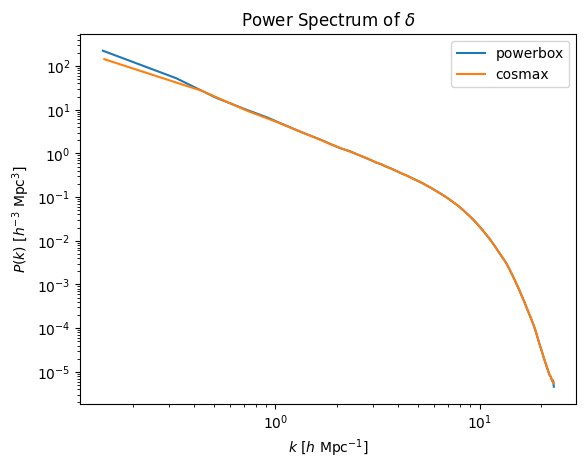

In [7]:
# generate power spectrum with powerbox
power_box, k_box = pbox.get_power(delta, MPH_h)
print(k_box)
# plot power spectrum
# plt.plot(k, power, label='cosmax')
plt.plot(k_box, power_box, label='powerbox')
plt.xscale('log')
plt.yscale('log')

plt.plot(k, power, label='cosmax')
plt.legend()

# ax_power.set_title(r'Power Spectrum of $\delta$')
# ax_power.set_xlabel(r'$k$ [$h \ \mathrm{Mpc}^{-1}$]')
# ax_power.set_ylabel(r'$P(k)$ [$h^{-3} \ \mathrm{Mpc}^3$]')

plt.title('Power Spectrum of $\delta$')
plt.xlabel(r'$k$ [$h \ \mathrm{Mpc}^{-1}$]')
plt.ylabel(r'$P(k)$ [$h^{-3} \ \mathrm{Mpc}^3$]')
